### Propagation de l'erreur de mesure de pression

Dans ce notebook nous nous penchons sur l'impact de l'erreur de la mesure de la pression à un instant t sur l'évolution de la température avec la profondeur.

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
class Stallman:

    def __init__(self,dH,K,cw,rhow,lambm,crhom,P,thamp,thmu,Z,T,err_H):
        
        
        self.rhow = rhow
        self.cw = cw          
        self.crhom = crhom
        self.lambm = lambm
        self.dH = dH
        self.K = K
        
        self.thamp= thamp
        self.thmu = thmu
        self.P = P
        self.Z=Z
        self.T=T
        self.err_H =err_H

    
        
    def apply(self):
        #on applique le calcul de la température dans chaque point de temps et de profondeur
        Xz, Xt, Y = np.empty(len(self.Z)*len(self.T)), np.empty(len(self.Z)*len(self.T)), np.empty(len(self.Z)*len(self.T)) #on crée les contenant des valeurs de profondeurs, de temps et de températures
         #création des variables intermédiaires dans le calcul des températures
        self.kape = self.lambm/self.crhom
        self.alphe=self.K*(self.rhow*self.cw)/self.crhom
        self.vt = - self.alphe*(self.dH)
        self.a = ((((self.vt**4+((8*np.pi*self.kape)/self.P)**2)**0.5+self.vt**2)/2)**0.5-self.vt)/(2*self.kape)
        self.b = (((self.vt**4+((8*np.pi*self.kape)/self.P)**2)**0.5-self.vt**2)/2)**0.5/(2*self.kape)
        for i,z in enumerate(self.Z):
            for j,t in enumerate(self.T):
                Xz[i*len(self.T)+j] = z
                Xt[i*len(self.T)+j] = t
                Y[i*len(self.T)+j] = self.thmu + self.thamp*np.exp(-self.a*z)*np.cos(t*2*np.pi/self.P - self.b*z) #on calcul la température en chaque point d'espace et de temps
        self.Xz = Xz
        self.Xt = Xt
        self.Y = Y
    def apply_propag(self):   
        Xz, Xt, Y = np.empty(len(self.Z)*len(self.T)), np.empty(len(self.Z)*len(self.T)), np.empty(len(self.Z)*len(self.T))
        DH=[]
        for j,t in enumerate(self.T):
            #on applique une erreur à notre mesure de pression à un instant t
            dH= self.dH + np.random.normal(0,abs(self.err_H)/2)
            #on propage cette erreur dans les variables du calcul de température
            self.kape = self.lambm/self.crhom
            self.alphe=self.K*(self.rhow*self.cw)/self.crhom
            self.vt = - self.alphe*(dH)
            self.a = ((((self.vt**4+((8*np.pi*self.kape)/self.P)**2)**0.5+self.vt**2)/2)**0.5-self.vt)/(2*self.kape)
            self.b = (((self.vt**4+((8*np.pi*self.kape)/self.P)**2)**0.5-self.vt**2)/2)**0.5/(2*self.kape)
            #on stock les variations de pression
            DH.append(dH)
            for i,z in enumerate(self.Z):
            
                Xz[i*len(self.T)+j] = z
                Xt[i*len(self.T)+j] = t

                #on calcul la température après propagation des erreurs
                Y[i*len(self.T)+j] = self.thmu + self.thamp*np.exp(-self.a*z)*np.cos(t*2*np.pi/self.P - self.b*z)
        self.PropXz = Xz
        self.PropXt = Xt
        self.PropY = Y
        self.PropDH = DH
    
    def plot_diff(self):
        #on plot la différence entre la température référence et la perturbée en fonction de la profondeur
        #avec un gradient de couleur pour indiquer le temps
        fig = plt.figure(figsize=(9,2.5))
        fig.tight_layout()
        ax = fig.add_subplot()
        colors = matplotlib.cm.get_cmap("magma")
        img = ax.scatter(self.Xz,self.Y-self.PropY,s=0.1,c=self.Xt,cmap=colors)
        ax.set_xlabel("prof")
        ax.set_ylabel("delttemp")
        fig.colorbar(img,label="temps")
        
        plt.show()  


#on définit tous les paramètres du problèmes
N,h = 500, 1
dH = -2*10**(-2)
cw, rhow = 4180, 1000
lambm, lambw = 1, 0.6
crhom = 4*10**6
P = 24*365*3600
thmu, thamp = 273.15+12.5, 12
err_H = 0.045*dH

Z = np.linspace(0,h,N)
T = np.linspace(0,P,int(P/(24*3600)))
K1=10**(-7)
K2=10**(-6)
K3=10**(-5)
K4=10**(-4)

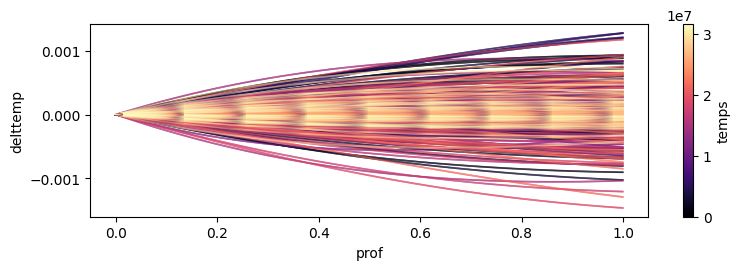

In [11]:
Ref1 = Stallman(dH,K1,cw,rhow,lambm,crhom,P,thamp,thmu,Z,T,err_H)
Ref1.apply()
Ref1.apply_propag()
Ref1.plot_diff()

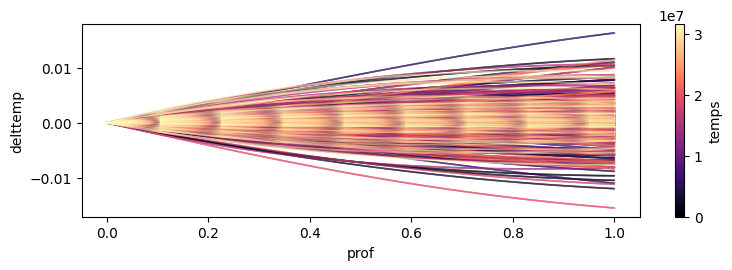

In [12]:
Ref2 = Stallman(dH,K2,cw,rhow,lambm,crhom,P,thamp,thmu,Z,T,err_H)
Ref2.apply()
Ref2.apply_propag()
Ref2.plot_diff()

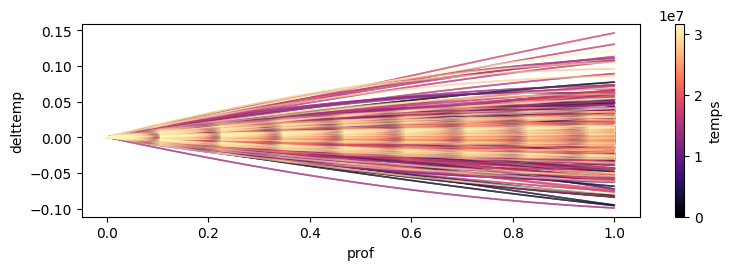

In [13]:
Ref3 = Stallman(dH,K3,cw,rhow,lambm,crhom,P,thamp,thmu,Z,T,err_H)
Ref3.apply()
Ref3.apply_propag()
Ref3.plot_diff()

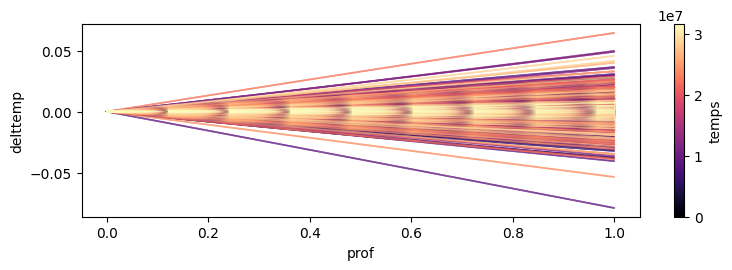

In [14]:
Ref4 = Stallman(dH,K4,cw,rhow,lambm,crhom,P,thamp,thmu,Z,T,err_H)
Ref4.apply()
Ref4.apply_propag()
Ref4.plot_diff()